In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers
from time import perf_counter 
import os
from keras.callbacks import ModelCheckpoint
from keras.models import load_model
from tensorflow.keras.utils import plot_model

In [2]:
## Defining batch specfications
batch_size = 100
img_height = 250
img_width = 250

In [3]:
## loading training set
training_data = tf.keras.preprocessing.image_dataset_from_directory(
    'data/train',
    seed=42,
    image_size= (img_height, img_width),
    batch_size=batch_size,
    color_mode='rgb'
)

Found 1114 files belonging to 2 classes.


In [4]:
## loading validation dataset
validation_data =  tf.keras.preprocessing.image_dataset_from_directory(
    'data/val',
    seed=42,
    image_size= (img_height, img_width),
    batch_size=batch_size,
    color_mode='rgb'
)

Found 98 files belonging to 2 classes.


In [5]:
## loading testing dataset
testing_data = tf.keras.preprocessing.image_dataset_from_directory(
    'data/test',
    seed=42,
    image_size= (img_height, img_width),
    batch_size=batch_size,
    color_mode='rgb'
)

Found 100 files belonging to 2 classes.


In [6]:
testing_data

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 250, 250, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [7]:
class_names = training_data.class_names
class_names

['Accident', 'Non Accident']

In [8]:
## Configuring dataset for performance
AUTOTUNE = tf.data.experimental.AUTOTUNE
training_data = training_data.cache().prefetch(buffer_size=AUTOTUNE)
testing_data = testing_data.cache().prefetch(buffer_size=AUTOTUNE)

In [9]:
## Defining Cnn
model = tf.keras.models.Sequential([
  layers.BatchNormalization(),
  layers.Conv2D(32, 3, activation='relu'), # Conv2D(f_size, filter_size, activation) # relu, sigmoid, softmax
  layers.MaxPooling2D(), # MaxPooling
  layers.Conv2D(64, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(128, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(256, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(512, activation='relu'),
  layers.Dense(len(class_names), activation= 'softmax')
])

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [10]:
model.build((None, 250, 250, 3))
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ batch_normalization             │ (None, 250, 250, 3)    │            12 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 248, 248, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 124, 124, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 122, 122, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 61, 61, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 59, 59, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 29, 29, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 27, 27, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 13, 13, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 43264)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │    22,151,680 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2)              │         1,026 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 22,541,134 (85.99 MB)

 Trainable params: 22,541,128 (85.99 MB)

 Non-trainable params: 6 (24.00 B)

In [11]:
## lets train our CNN
checkpoint = ModelCheckpoint("model_weights.h5", monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]
history = model.fit(training_data, validation_data=validation_data, epochs = 20, callbacks=callbacks_list)

Epoch 1/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7s/step - accuracy: 0.4849 - loss: 4.5735
Epoch 1: val_accuracy improved from -inf to 0.53061, saving model to model_weights.h5


12/12 ━━━━━━━━━━━━━━━━━━━━ 106s 8s/step - accuracy: 0.4876 - loss: 4.4295 - val_accuracy: 0.5306 - val_loss: 1.2429
Epoch 2/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10s/step - accuracy: 0.5512 - loss: 0.6830 
Epoch 2: val_accuracy did not improve from 0.53061
12/12 ━━━━━━━━━━━━━━━━━━━━ 121s 10s/step - accuracy: 0.5545 - loss: 0.6812 - val_accuracy: 0.5306 - val_loss: 1.5130
Epoch 3/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9s/step - accuracy: 0.6412 - loss: 0.6232 
Epoch 3: val_accuracy improved from 0.53061 to 0.64286, saving model to model_weights.h5


12/12 ━━━━━━━━━━━━━━━━━━━━ 118s 10s/step - accuracy: 0.6448 - loss: 0.6207 - val_accuracy: 0.6429 - val_loss: 0.7356
Epoch 4/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9s/step - accuracy: 0.7161 - loss: 0.5561  
Epoch 4: val_accuracy improved from 0.64286 to 0.69388, saving model to model_weights.h5


12/12 ━━━━━━━━━━━━━━━━━━━━ 117s 10s/step - accuracy: 0.7184 - loss: 0.5534 - val_accuracy: 0.6939 - val_loss: 0.6959
Epoch 5/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 12s/step - accuracy: 0.7825 - loss: 0.4771 
Epoch 5: val_accuracy improved from 0.69388 to 0.71429, saving model to model_weights.h5


12/12 ━━━━━━━━━━━━━━━━━━━━ 143s 12s/step - accuracy: 0.7845 - loss: 0.4744 - val_accuracy: 0.7143 - val_loss: 0.7245
Epoch 6/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 18s/step - accuracy: 0.8243 - loss: 0.3998 
Epoch 6: val_accuracy did not improve from 0.71429
12/12 ━━━━━━━━━━━━━━━━━━━━ 214s 18s/step - accuracy: 0.8253 - loss: 0.3976 - val_accuracy: 0.7143 - val_loss: 0.6612
Epoch 7/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7s/step - accuracy: 0.8643 - loss: 0.3077
Epoch 7: val_accuracy did not improve from 0.71429
12/12 ━━━━━━━━━━━━━━━━━━━━ 88s 7s/step - accuracy: 0.8655 - loss: 0.3057 - val_accuracy: 0.6633 - val_loss: 1.4041
Epoch 8/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10s/step - accuracy: 0.8880 - loss: 0.2752 
Epoch 8: val_accuracy improved from 0.71429 to 0.77551, saving model to model_weights.h5


12/12 ━━━━━━━━━━━━━━━━━━━━ 115s 10s/step - accuracy: 0.8898 - loss: 0.2723 - val_accuracy: 0.7755 - val_loss: 0.6997
Epoch 9/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9s/step - accuracy: 0.9193 - loss: 0.1964
Epoch 9: val_accuracy improved from 0.77551 to 0.82653, saving model to model_weights.h5


12/12 ━━━━━━━━━━━━━━━━━━━━ 129s 10s/step - accuracy: 0.9199 - loss: 0.1951 - val_accuracy: 0.8265 - val_loss: 0.5703
Epoch 10/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 16s/step - accuracy: 0.9353 - loss: 0.1517 
Epoch 10: val_accuracy did not improve from 0.82653
12/12 ━━━━━━━━━━━━━━━━━━━━ 191s 16s/step - accuracy: 0.9358 - loss: 0.1509 - val_accuracy: 0.8163 - val_loss: 0.5419
Epoch 11/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8s/step - accuracy: 0.9454 - loss: 0.1307
Epoch 11: val_accuracy did not improve from 0.82653
12/12 ━━━━━━━━━━━━━━━━━━━━ 102s 9s/step - accuracy: 0.9458 - loss: 0.1300 - val_accuracy: 0.7857 - val_loss: 1.0720
Epoch 12/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8s/step - accuracy: 0.9471 - loss: 0.1277
Epoch 12: val_accuracy did not improve from 0.82653
12/12 ━━━━━━━━━━━━━━━━━━━━ 98s 8s/step - accuracy: 0.9483 - loss: 0.1255 - val_accuracy: 0.8163 - val_loss: 0.6081
Epoch 13/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7s/step - accuracy: 0.9826 - loss: 0.0643
Epoch 13: val_accuracy improved from 0.82

12/12 ━━━━━━━━━━━━━━━━━━━━ 87s 7s/step - accuracy: 0.9825 - loss: 0.0639 - val_accuracy: 0.8367 - val_loss: 0.7587
Epoch 14/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8s/step - accuracy: 0.9748 - loss: 0.0609
Epoch 14: val_accuracy improved from 0.83673 to 0.84694, saving model to model_weights.h5


12/12 ━━━━━━━━━━━━━━━━━━━━ 100s 8s/step - accuracy: 0.9754 - loss: 0.0601 - val_accuracy: 0.8469 - val_loss: 0.5766
Epoch 15/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7s/step - accuracy: 0.9955 - loss: 0.0303
Epoch 15: val_accuracy did not improve from 0.84694
12/12 ━━━━━━━━━━━━━━━━━━━━ 88s 7s/step - accuracy: 0.9954 - loss: 0.0299 - val_accuracy: 0.8367 - val_loss: 1.0808
Epoch 16/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.9735 - loss: 0.0621
Epoch 16: val_accuracy did not improve from 0.84694
12/12 ━━━━━━━━━━━━━━━━━━━━ 66s 6s/step - accuracy: 0.9742 - loss: 0.0611 - val_accuracy: 0.8163 - val_loss: 0.7505
Epoch 17/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6s/step - accuracy: 0.9775 - loss: 0.0552
Epoch 17: val_accuracy did not improve from 0.84694
12/12 ━━━━━━━━━━━━━━━━━━━━ 68s 6s/step - accuracy: 0.9777 - loss: 0.0550 - val_accuracy: 0.8367 - val_loss: 0.6970
Epoch 18/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6s/step - accuracy: 0.9884 - loss: 0.0358
Epoch 18: val_accuracy did not improve from 0.8

In [12]:
###### serialize model structure to JSON
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)

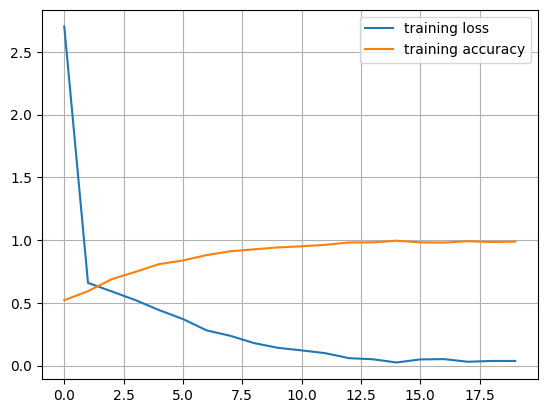

In [13]:
## stats on training data
plt.plot(history.history['loss'], label = 'training loss')
plt.plot(history.history['accuracy'], label = 'training accuracy')
plt.grid(True)
plt.legend()

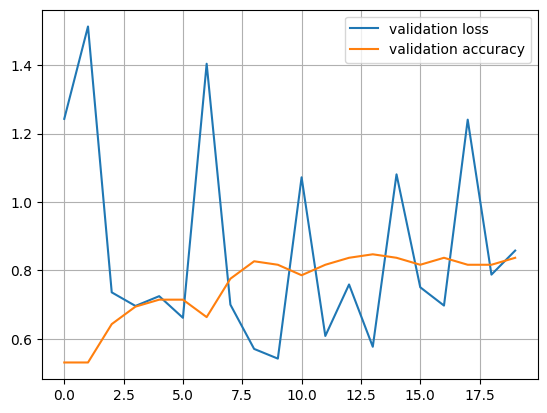

In [14]:
## stats on training data
plt.plot(history.history['val_loss'], label = 'validation loss')
plt.plot(history.history['val_accuracy'], label = 'validation accuracy')
plt.grid(True)
plt.legend()

4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 419ms/step


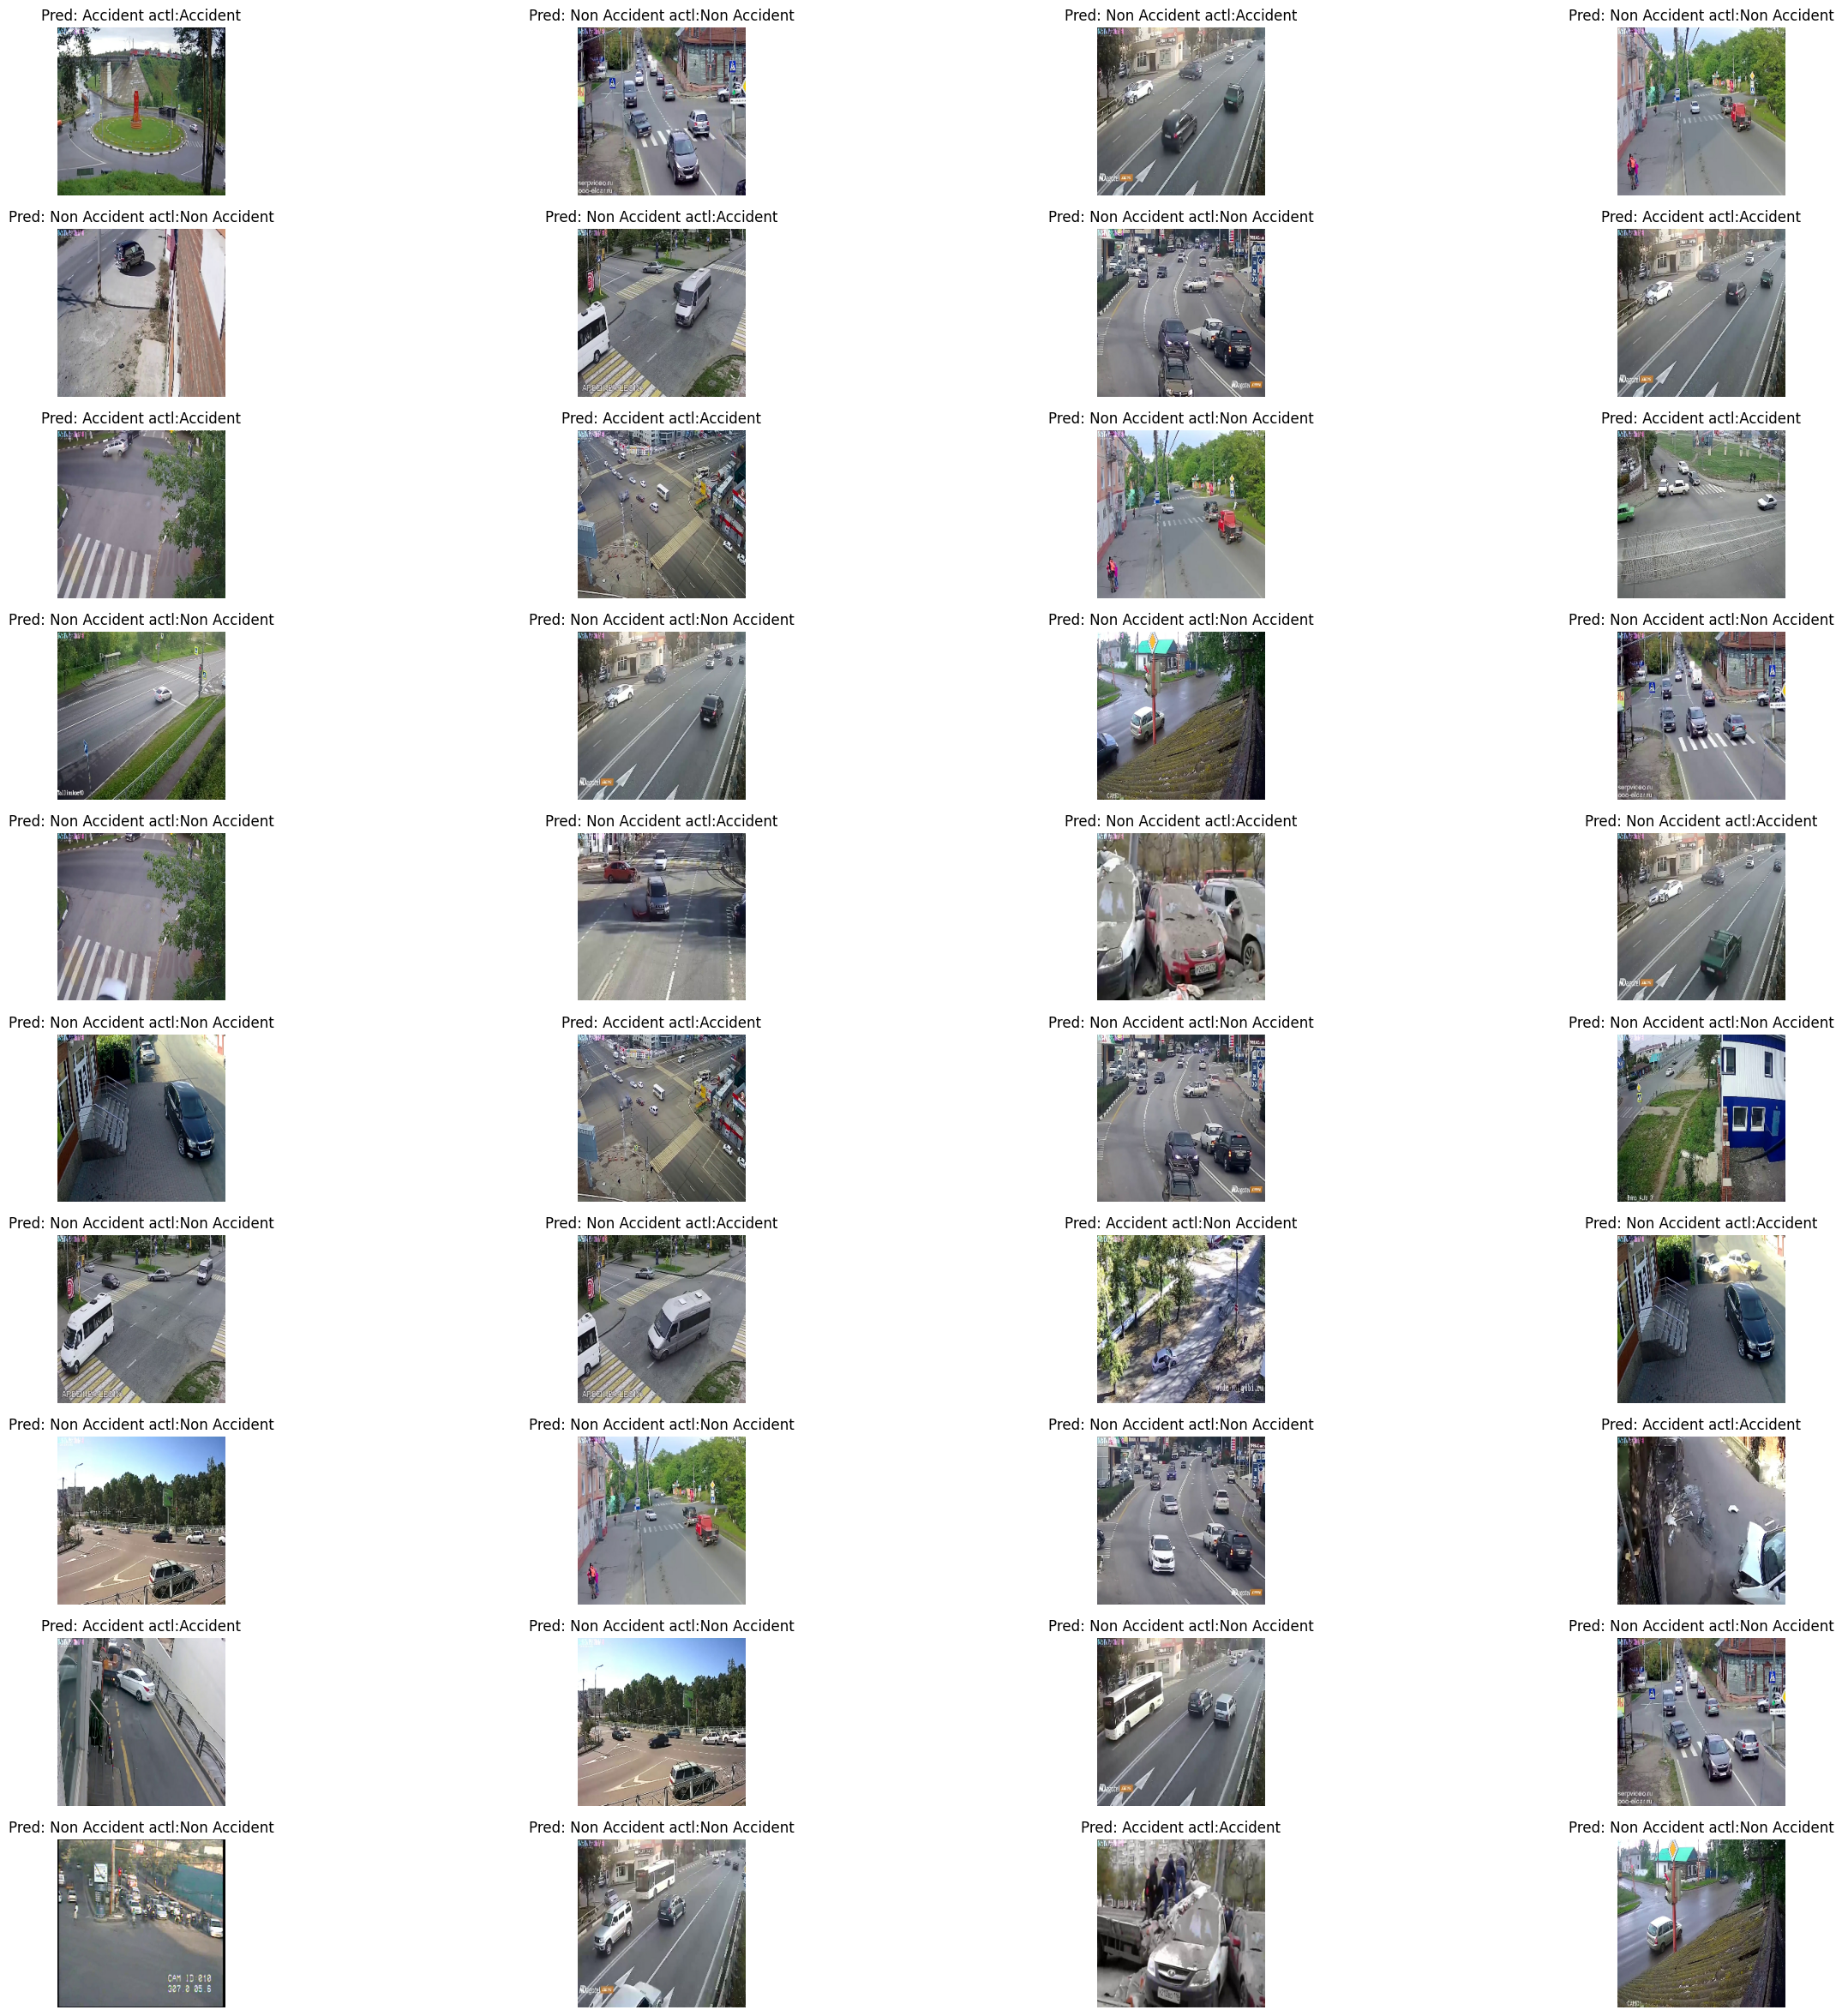

In [15]:
## lets vizualize results on testing data
AccuracyVector = []
plt.figure(figsize=(30, 30))
for images, labels in testing_data.take(1):
    predictions = model.predict(images)
    predlabel = []
    prdlbl = []
    
    for mem in predictions:
        predlabel.append(class_names[np.argmax(mem)])
        prdlbl.append(np.argmax(mem))
    
    AccuracyVector = np.array(prdlbl) == labels
    for i in range(40):
        ax = plt.subplot(10, 4, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title('Pred: '+ predlabel[i]+' actl:'+class_names[labels[i]] )
        plt.axis('off')
        plt.grid(True)